# Simple Evolutionary Exploration  Walkthrough

This notebook contains instructions on how to use the SEE module, along with several examples. These instructions will cover the following parts: 
* [Import Image Files](#Import_Image_Files)
* [Manual Search](#Manual_Search)
* [Genetic Algorithm Search](#Genetic_Algorithm_Search)
* [Reading the Results](#Reading_the_Results)

These examples use the Jupyter widgets to make it interactive and easier to use and learn.

----
<a name="Import_Image_Files"></a>

## Import Image Files

First import the following packages:

In [1]:
%matplotlib inline
import matplotlib.pylab as plt
import imageio
from see import Segmentors
from see import JupyterGUI

Pick an image from the example folder.

Dropdown(description='Choose image:', options=(PosixPath('Image_data/Examples/Airpods.JPEG'), PosixPath('Image…

import imageio
data.img = imageio.imread('Image_data/Examples/Airpods.JPEG')
data.gmask = imageio.imread('Image_data/Examples/Airpods_GT.png')


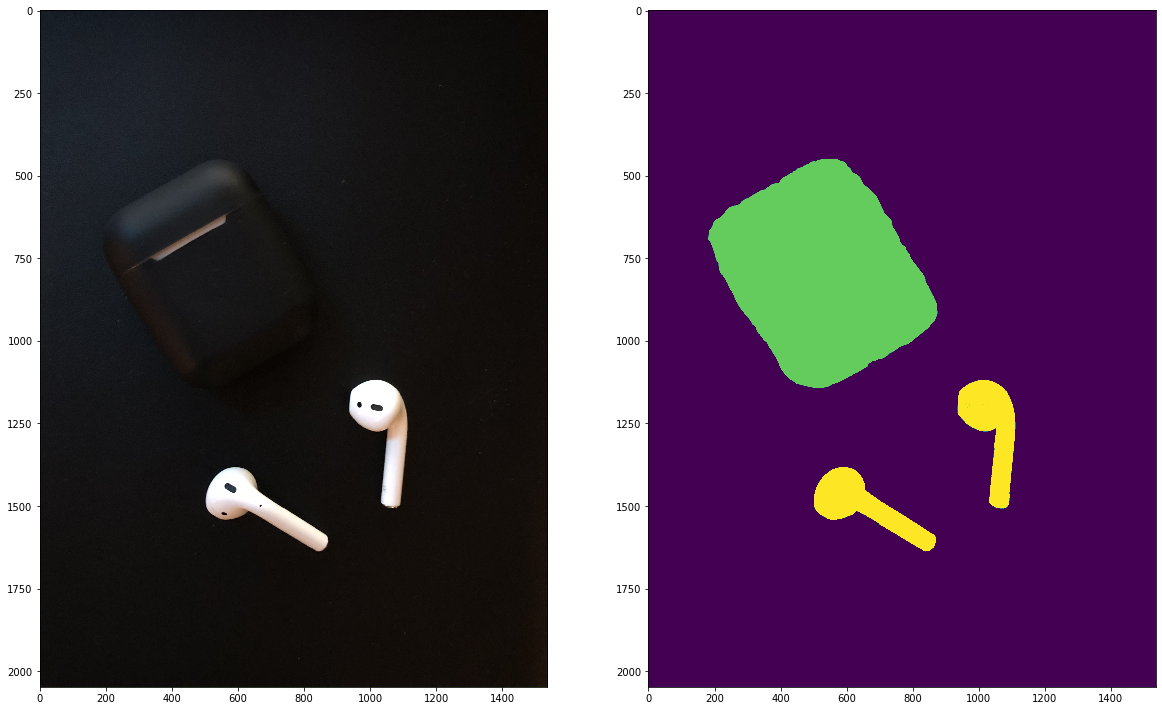

In [2]:
data = JupyterGUI.pickimage('Image_data/Examples/')

# Select ColorSpace

In [3]:
from see.ColorSpace import colorspace 
cs = colorspace()
img = cs.evaluate(data.img)

----
<a name="Manual_Search"></a>

## Manual Search

Manual searching of parameters can easily be done using the provided GUI. Pre-established parameters can be put into the widget, or the parameter values can be changed using the sliders. To change the algorithm, simply change the `alg` input. For a list of available inputs print `Segmentors.algorithmspace`


In [4]:
from see.Segmentors import segmentor

alg = JupyterGUI.picksegment(list(segmentor.algorithmspace.keys()))

Dropdown(description='Choose Algorithm:', options=('ColorThreshold', 'Felzenszwalb', 'Slic', 'SlicO', 'QuickSh…

ColorThreshold
    
    Peform Color Thresholding segmentation algorithm. Segments parts of the image
    based on the numerical values for the respective channel.

    Parameters:
    mulitchannel - (multichannel) - bool, Whether the image is 2D or 3D
    colorspace - (colorspace) Select the colorspace [‘RGB’, ‘HSV’, ‘RGB CIE’, ‘XYZ’, ‘YUV’, ‘YIQ’, ‘YPbPr’, ‘YCbCr’, ‘YDbDr’]
    channel - (channel) color chanel (0:R/H/L 1:G/S/A, 2:B/V/B)
    ch0_mn - (alpha1) - minimum thresholding value for channel 0
    ch0_mx - (alpha2) - maximum thresholding value for channel 0
    ch1_mn - (beta1) - minimum thresholding value for channel 1
    ch1_mx - (beta2) - maximum thresholding value for channel 1
    ch2_mn - (gamma1) - minimum thresholding value for channel 2
    ch2_mx - (gamma2) - maximum thresholding value for channel 2
    
    Note: a colorspace of 'HSV' and a channel of 2 is a grayscale image. 
    
    Typically any pixel between my_mn and my_mx are true. Other pixels are false.
   

In [5]:
### Example of input for params
params = JupyterGUI.segmentwidget(data.img, params = None, alg = alg.value)

AssertionError: ERROR n_segments is not in parameter list

----
<a name="Genetic_Algorithm_Search"></a>

## Genetic Algorithm Search

First import image files, as well as the following packages:

In [ ]:
from see import GeneticSearch, Segmentors

To run the genetic algorithm, we need to initialize an instance of an evolver. The original image and ground truth segmentation image are inputs to it, along with an integer value for population size. This value sets how many indivudals are in our population. For this example, we'll set this number to be equal to 10.

In [ ]:
my_evolver = GeneticSearch.Evolver(data.img, data.mask, pop_size=10)

Now that the evolver has been initialized, we can run the genetic algorithm for a specified number of generations (or iterations). Here we will set this number equal to 5.

In [ ]:
# warnings may appear when this runs
population = my_evolver.run(ngen=5)

----
<a name="Reading_the_Results"></a>

## Reading the Results

After the genetic algorithm is complete, we can retrieve the individuals that resulted in the lowest (best) fitness values by printing `my_evolver.hof`. These individuals are sorted according to fitness value, so to get the overal best individual, we can simply look at the first individual in the list. 

In [ ]:
params = my_evolver.hof[0]

print('Best Individual:\n', params)

We can see the mask this individual generates by evaluating it, then plotting the result:

In [ ]:
seg = Segmentors.algoFromParams(params)
mask = seg.evaluate(data.img)

plt.figure(figsize=(20, 10))
plt.subplot(121)
plt.imshow(data.img)
plt.title("Original Image")
plt.axis('off')

plt.subplot(122)
plt.imshow(mask)
plt.title("Segmentation")
plt.axis('off')

plt.tight_layout
plt.show()

We can also use `FitnessFunction` to calculate the final fitness value for this algorithm:

In [ ]:
print('Fitness Value: ', Segmentors.FitnessFunction(mask, data.mask)[0])

If this value is satisfactory, we can then get usable code to run this algorithm anywhere, including outside this notebook. The `print_best_algorithm_code` function does this using the given individual:

In [ ]:
ex = Segmentors.print_best_algorithm_code(my_evolver.hof[0])

With this code, make sure to import skimage, along with any input images this algorithm will be applied to.